In [2]:
import server
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from collections import defaultdict
# from functions import *

In [3]:
sv = server.Server()

In [16]:
sv.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0.3374754185208731,
 'topVaultScores': [0.8,
  0.359,
  0,
  0,
  0,
  0.9230769230769231,
  0,
  0.002,
  0,
  0.8555,
  0.941,
  0.22462809917355372,
  0.7445],
 'probesRemaining': [34, 12, 20, 20, 20, 5, 20, 15, 20, 11, 10, 6, 1],
 'attacksRemaining': [36, 19, 20, 20, 20, 16, 20, 19, 20, 18, 16, 19, 18],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

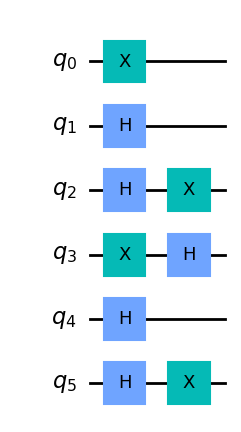

In [13]:
qc = QuantumCircuit(6)
qc.x(0)

qc.x(3)
qc.h(1)
qc.h(3)
qc.h(4)
qc.h(5)
qc.x(5)
qc.h(2)
qc.x(2)
qc.draw()

In [14]:
sv.probe(vault_index=1, circuit=qc.qasm())

{'0': 0.305,
 '1': 0.005,
 '2': 0.02,
 '4': 0.03,
 '5': 0.005,
 '8': 0.205,
 '10': 0.025,
 '11': 0.005,
 '12': 0.04,
 '16': 0.19,
 '18': 0.01,
 '19': 0.005,
 '20': 0.02,
 '24': 0.005,
 '31': 0.005,
 '32': 0.01,
 '40': 0.075,
 '42': 0.01,
 '44': 0.015,
 '45': 0.005,
 '56': 0.005,
 '60': 0.005}

In [6]:
def plot_good(res, n):
    # Convert keys to integers and sort them
    keys_as_int = sorted(map(int, res.keys()))

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, f'0{n}b') for key in keys_as_int]
    print(binary_labels)

    # Extract corresponding values
    values = [res[str(key)] for key in keys_as_int]

    # Plotting
    plt.bar(binary_labels, values)
    plt.xlabel('Binary Number (Big Endian)')
    plt.ylabel('Value')
    plt.title('Histogram of Result Object')
    plt.show()


['000001', '000010', '000101', '000110', '001000', '001001', '001010', '001111', '010001', '010010', '010111', '011000', '011010', '011011', '011100', '011101', '011111', '100000', '100001', '100010', '100011', '100100', '100101', '100110', '100111', '101001', '101010', '101011', '101110', '101111', '110000', '110001', '110010', '110011', '110100', '110101', '110110', '110111', '111000', '111001', '111010', '111011', '111101', '111110', '111111']


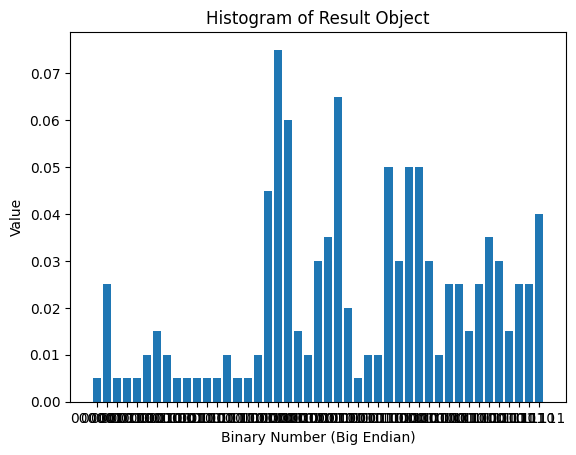

In [8]:
plot_good({'1': 0.005,
 '2': 0.025,
 '5': 0.005,
 '6': 0.005,
 '8': 0.005,
 '9': 0.01,
 '10': 0.015,
 '15': 0.01,
 '17': 0.005,
 '18': 0.005,
 '23': 0.005,
 '24': 0.005,
 '26': 0.005,
 '27': 0.01,
 '28': 0.005,
 '29': 0.005,
 '31': 0.01,
 '32': 0.045,
 '33': 0.075,
 '34': 0.06,
 '35': 0.015,
 '36': 0.01,
 '37': 0.03,
 '38': 0.035,
 '39': 0.065,
 '41': 0.02,
 '42': 0.005,
 '43': 0.01,
 '46': 0.01,
 '47': 0.05,
 '48': 0.03,
 '49': 0.05,
 '50': 0.05,
 '51': 0.03,
 '52': 0.01,
 '53': 0.025,
 '54': 0.025,
 '55': 0.015,
 '56': 0.025,
 '57': 0.035,
 '58': 0.03,
 '59': 0.015,
 '61': 0.025,
 '62': 0.025,
 '63': 0.04}, 6)

In [7]:
def probability(res, n):
    keys_as_int = sorted(map(int, res.keys()))
    ans = {}

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, f'0{n}b') for key in keys_as_int]

    for i in range(n):
        for j in range(len(binary_labels)):
            if binary_labels[j][i] == '0':
                if i in ans:
                    ans[i] += res[str(keys_as_int[j])]

                else:
                    ans[i] = res[str(keys_as_int[j])]

    return ans

In [10]:
probability({'1': 0.005,
 '2': 0.025,
 '5': 0.005,
 '6': 0.005,
 '8': 0.005,
 '9': 0.01,
 '10': 0.015,
 '15': 0.01,
 '17': 0.005,
 '18': 0.005,
 '23': 0.005,
 '24': 0.005,
 '26': 0.005,
 '27': 0.01,
 '28': 0.005,
 '29': 0.005,
 '31': 0.01,
 '32': 0.045,
 '33': 0.075,
 '34': 0.06,
 '35': 0.015,
 '36': 0.01,
 '37': 0.03,
 '38': 0.035,
 '39': 0.065,
 '41': 0.02,
 '42': 0.005,
 '43': 0.01,
 '46': 0.01,
 '47': 0.05,
 '48': 0.03,
 '49': 0.05,
 '50': 0.05,
 '51': 0.03,
 '52': 0.01,
 '53': 0.025,
 '54': 0.025,
 '55': 0.015,
 '56': 0.025,
 '57': 0.035,
 '58': 0.03,
 '59': 0.015,
 '61': 0.025,
 '62': 0.025,
 '63': 0.04}, 6)

{0: 0.13500000000000004,
 1: 0.5100000000000001,
 2: 0.6250000000000001,
 3: 0.5850000000000002,
 4: 0.42500000000000004,
 5: 0.43000000000000005}

In [13]:
probability({'0': 0.005,
 '1': 0.34,
 '2': 0.005,
 '3': 0.025,
 '5': 0.075,
 '8': 0.005,
 '9': 0.14,
 '11': 0.025,
 '12': 0.015,
 '13': 0.005,
 '16': 0.005,
 '17': 0.12,
 '19': 0.015,
 '21': 0.01,
 '25': 0.065,
 '27': 0.01,
 '29': 0.005,
 '31': 0.005,
 '33': 0.03,
 '35': 0.005,
 '41': 0.06,
 '45': 0.02,
 '49': 0.005,
 '53': 0.005}, 6)

{0: 0.8750000000000002,
 1: 0.7550000000000001,
 2: 0.6450000000000001,
 3: 0.86,
 4: 0.9100000000000001,
 5: 0.034999999999999996}

['000000', '000001', '000010', '000011', '000101', '001000', '001001', '001011', '001100', '001101', '010000', '010001', '010011', '010101', '011001', '011011', '011101', '011111', '100001', '100011', '101001', '101101', '110001', '110101']


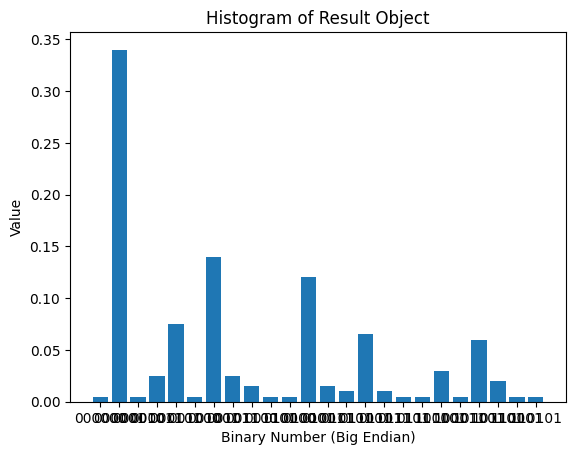

In [14]:
plot_good({'0': 0.005,
 '1': 0.34,
 '2': 0.005,
 '3': 0.025,
 '5': 0.075,
 '8': 0.005,
 '9': 0.14,
 '11': 0.025,
 '12': 0.015,
 '13': 0.005,
 '16': 0.005,
 '17': 0.12,
 '19': 0.015,
 '21': 0.01,
 '25': 0.065,
 '27': 0.01,
 '29': 0.005,
 '31': 0.005,
 '33': 0.03,
 '35': 0.005,
 '41': 0.06,
 '45': 0.02,
 '49': 0.005,
 '53': 0.005}, 6)

In [17]:
sv.attack(vault_index=1, circuit=qc.qasm())

{'score': 0.359, 'rawScore': 0.359, 'costFactor': 1}

In [8]:
probability({'0': 0.335,
 '1': 0.01,
 '2': 0.02,
 '3': 0.01,
 '4': 0.065,
 '5': 0.01,
 '8': 0.14,
 '9': 0.005,
 '10': 0.02,
 '11': 0.005,
 '12': 0.02,
 '16': 0.125,
 '18': 0.01,
 '19': 0.005,
 '20': 0.01,
 '24': 0.065,
 '26': 0.01,
 '28': 0.005,
 '31': 0.005,
 '32': 0.03,
 '34': 0.005,
 '40': 0.055,
 '41': 0.005,
 '44': 0.015,
 '45': 0.005,
 '48': 0.005,
 '52': 0.005}, 6)

{0: 0.8750000000000002,
 1: 0.7550000000000002,
 2: 0.6450000000000001,
 3: 0.8600000000000003,
 4: 0.9100000000000003,
 5: 0.9400000000000002}

In [12]:
probability({'0': 0.195,
 '1': 0.005,
 '2': 0.02,
 '4': 0.025,
 '6': 0.005,
 '8': 0.26,
 '10': 0.06,
 '11': 0.005,
 '12': 0.065,
 '16': 0.015,
 '24': 0.18,
 '25': 0.005,
 '26': 0.01,
 '27': 0.005,
 '28': 0.015,
 '31': 0.005,
 '32': 0.075,
 '34': 0.005,
 '36': 0.015,
 '40': 0.015,
 '44': 0.005,
 '48': 0.005,
 '58': 0.005}, 6)

{0: 0.8750000000000002,
 1: 0.7550000000000001,
 2: 0.36500000000000005,
 3: 0.865,
 4: 0.8800000000000001,
 5: 0.975}

In [15]:
probability({'0': 0.305,
 '1': 0.005,
 '2': 0.02,
 '4': 0.03,
 '5': 0.005,
 '8': 0.205,
 '10': 0.025,
 '11': 0.005,
 '12': 0.04,
 '16': 0.19,
 '18': 0.01,
 '19': 0.005,
 '20': 0.02,
 '24': 0.005,
 '31': 0.005,
 '32': 0.01,
 '40': 0.075,
 '42': 0.01,
 '44': 0.015,
 '45': 0.005,
 '56': 0.005,
 '60': 0.005}, 6)

{0: 0.8750000000000001,
 1: 0.755,
 2: 0.6,
 3: 0.8750000000000001,
 4: 0.92,
 5: 0.97}